# Bibliotecas

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Leitura dos dados

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [18]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

# 1. Análise Exploratória

## Boxplots

/tmp/ipython-input-3748863756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axs[0], palette="Blues")
/tmp/ipython-input-3748863756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axs[1], palette="Greens")
/tmp/ipython-input-3748863756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axs[2], palette="Reds")


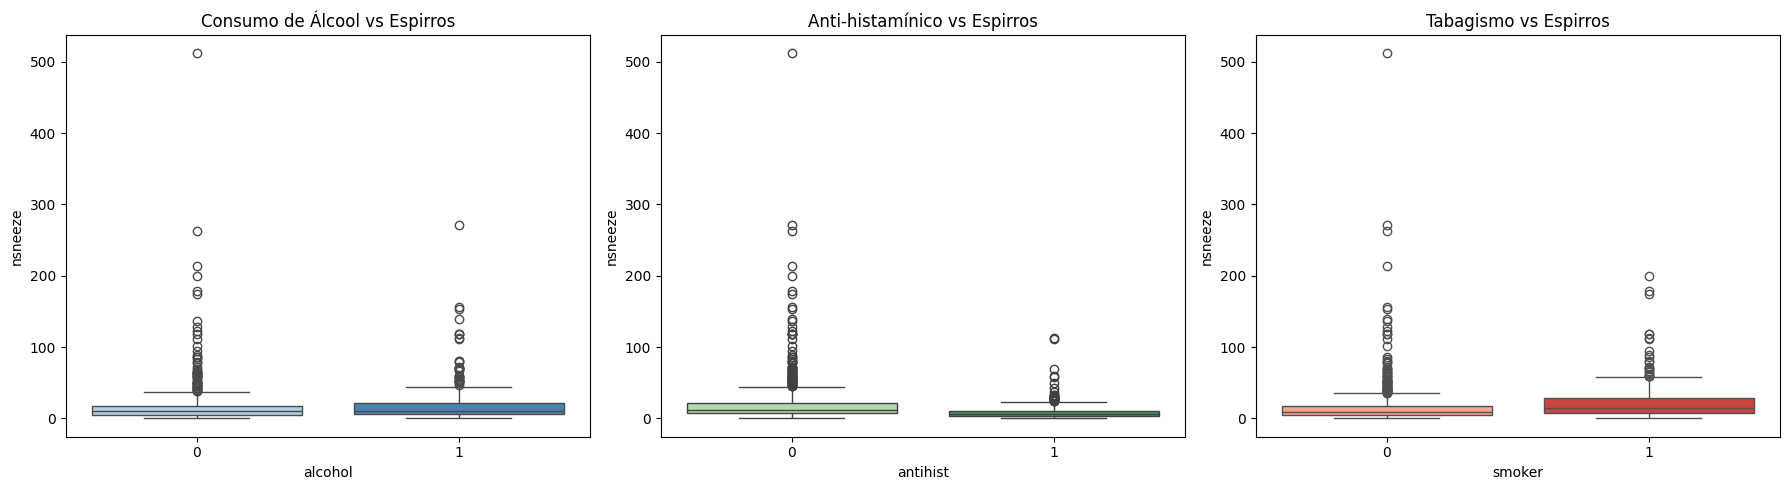

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axs[0], palette="Blues")
axs[0].set_title('Consumo de Álcool vs Espirros')

sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axs[1], palette="Greens")
axs[1].set_title('Anti-histamínico vs Espirros')

sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axs[2], palette="Reds")
axs[2].set_title('Tabagismo vs Espirros')

plt.tight_layout()
plt.show()



A visualização das distribuições condicionais indica que o comportamento da variável resposta é sensível aos fatores de exposição:
* **Fatores de Risco:** Observa-se um deslocamento positivo nas medidas de tendência central (mediana) para os grupos expostos ao consumo de álcool (`alcohol = 1`) e tabagismo (`smoker = 1`), sugerindo uma associação positiva com a frequência de espirros. Além disso, nota-se uma maior dispersão (amplitude interquartil) e a presença acentuada de *outliers* na cauda superior nesses grupos.
* **Fator de Proteção:** O uso de anti-histamínicos (`antihist = 1`) apresenta uma redução substancial na mediana e na variabilidade da contagem de espirros em comparação ao grupo controle, indicando um forte efeito inibitório.


## Gráfico de Dispersão

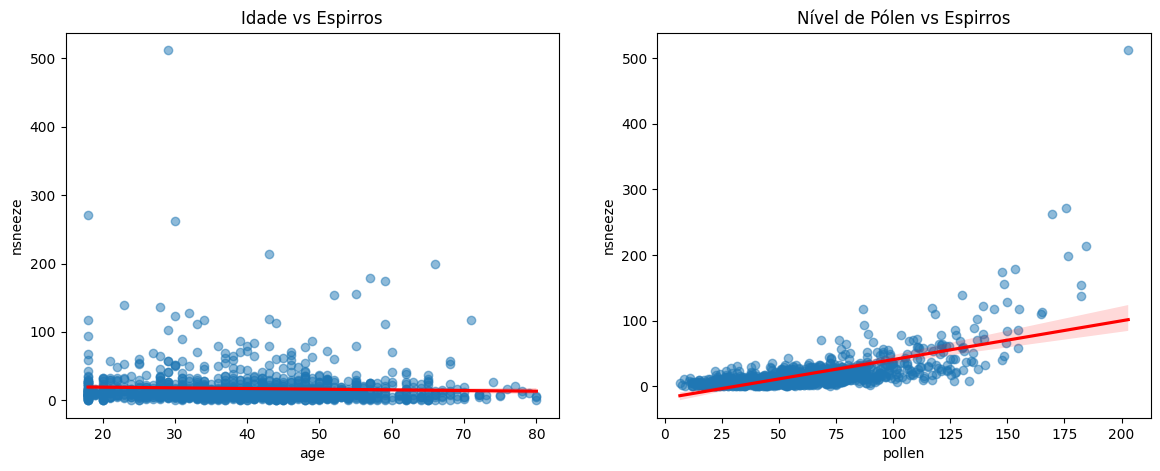

Correlação de Spearman com nsneeze
nsneeze     1.000000
pollen      0.663033
smoker      0.196849
alcohol     0.082004
age        -0.105915
antihist   -0.306747
Name: nsneeze, dtype: float64


In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(x='age', y='nsneeze', data=df, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0].set_title('Idade vs Espirros')

sns.regplot(x='pollen', y='nsneeze', data=df, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1].set_title('Nível de Pólen vs Espirros')

plt.show()

print("Correlação de Spearman com nsneeze")
correlacao = df.corr(method='spearman')['nsneeze'].sort_values(ascending=False)
print(correlacao)


 1. **Concentração de Pólen:** O gráfico de dispersão entre `pollen` e `nsneeze` evidencia uma relação positiva e monotônica, corroborada pelo coeficiente de correlação de Spearman ($\rho \approx 0,66$). É fundamental notar o comportamento de heterocedasticidade: à medida que a concentração de pólen aumenta, a variância da resposta também aumenta (formato de "cone"). Este fenômeno viola a suposição de homocedasticidade da regressão linear clássica e reforça a necessidade de um modelo da Família Exponencial (como Poisson ou Binomial Negativa) onde a variância é uma função da média.
2.  **Idade:** A variável `age` apresentou uma correlação negativa fraca ($\rho \approx -0,11$) e dispersão difusa, sugerindo um impacto marginal ou pouco significativo na variável resposta.


## Pólen VS Anti-histamínico

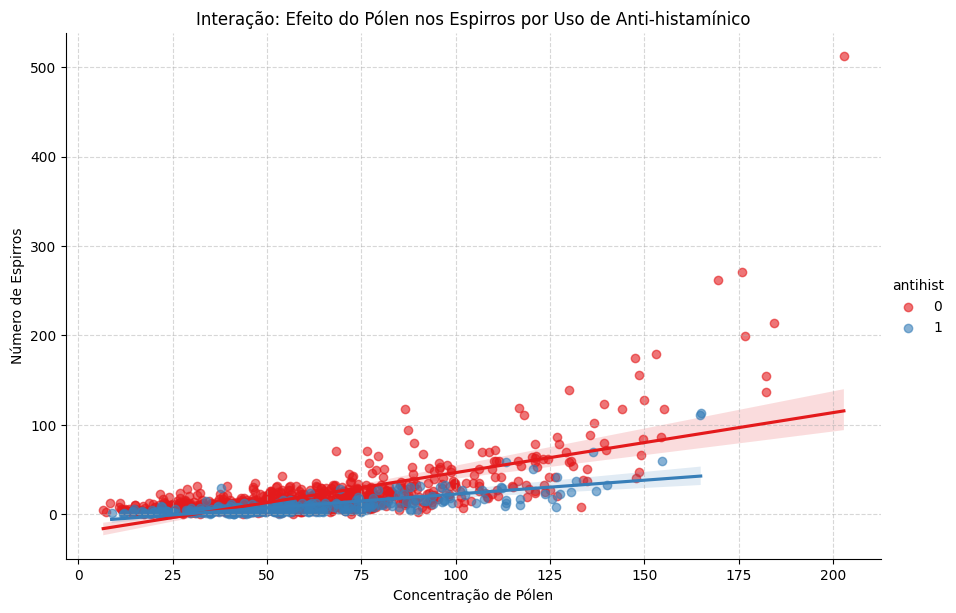

In [21]:
sns.lmplot(
    x='pollen',
    y='nsneeze',
    hue='antihist',
    data=df,
    aspect=1.5,
    height=6,
    palette='Set1',
    scatter_kws={'alpha': 0.6}
)

plt.title('Interação: Efeito do Pólen nos Espirros por Uso de Anti-histamínico')
plt.xlabel('Concentração de Pólen')
plt.ylabel('Número de Espirros')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

A visualização da relação entre a concentração de pólen e a frequência de espirros, estratificada pelo uso de anti-histamínicos, sugere fortemente a presença de uma interação estatística (modificação de efeito). Observa-se que as retas de regressão não são paralelas: o grupo sem medicação (vermelho, `antihist = 0`) apresenta uma inclinação (coeficiente angular) substancialmente mais acentuada do que o grupo tratado (azul, `antihist = 1`). Isso indica que o anti-histamínico não apenas reduz o nível basal de espirros, mas também atenua a sensibilidade dos pacientes ao aumento da concentração de pólen. Em termos de modelagem, a divergência das inclinações justifica a investigação de um termo de interação entre `pollen` e `antihist` no ajuste do modelo.


## Gráfico de Calor

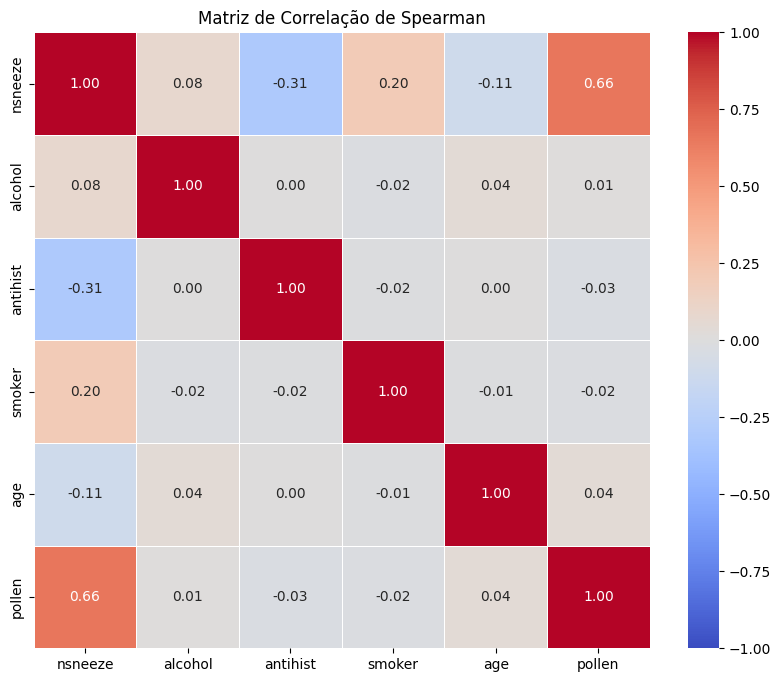

In [22]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True)

plt.title('Matriz de Correlação de Spearman')
plt.show()

É possível observar dois fatores importantes


1.   Associações com a Resposta (nsneeze):  Pollen tem a associação mais forte positiva (0.66), seguido por antihist com associação negativa (-0.31).

2.    Ausência de Multicolinearidade: Cruzamento entre as variáveis explicativas apresentam um valor próximo de 0.

# 2. Ajuste do modelo de Poisson

In [23]:
formula_poisson = 'nsneeze ~ alcohol + antihist + smoker + age + pollen'

modelo_poisson = smf.glm(formula=formula_poisson, data=df, family=sm.families.Poisson()).fit()

print(modelo_poisson.summary())

print("\n Interpretação: Razão de Taxas (exp(beta))")
params_exp = np.exp(modelo_poisson.params)
conf_int_exp = np.exp(modelo_poisson.conf_int())
conf_int_exp.columns = ['2.5%', '97.5%']
print(pd.concat([params_exp.rename("Rate Ratio"), conf_int_exp], axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Sun, 30 Nov 2025   Deviance:                       4949.1
Time:                        04:34:06   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5560      0.026     59.520      0.0

 A análise das razões de taxas (RR) revela que o tabagismo ($RR \approx 1.59$; IC95\%: 1.54-1.64) e o consumo de álcool ($RR \approx 1.24$; IC95\%: 1.21-1.28) são fatores de risco claros, elevando a contagem esperada de espirros em 59% e 24%, respectivamente. Em contrapartida, o uso de anti-histamínicos demonstrou forte eficácia, associado a uma redução de aproximadamente 48% na sintomatologia ($RR \approx 0.52$). Observou-se também uma relação dose-resposta positiva com a concentração de pólen, onde cada unidade de aumento no índice polínico acarreta um incremento de 2,3% na frequência de espirros.

# 3. Investigação da SuperDispersão

## Dispersão de Pearson

In [24]:
pearson_chi2 = modelo_poisson.pearson_chi2
df_resid = modelo_poisson.df_resid

phi_pearson = pearson_chi2 / df_resid

print(f"Chi-quadrado de Pearson: {pearson_chi2:.4f}")
print(f"Graus de Liberdade: {df_resid}")
print(f"Estatística de Dispersão (Phi): {phi_pearson:.4f}")

Chi-quadrado de Pearson: 5036.8454
Graus de Liberdade: 1194
Estatística de Dispersão (Phi): 4.2185


A razão entre a estatística Qui-quadrado de Pearson e os graus de liberdade residuais resultou em $\phi \approx 4.22$. Sendo este valor substancialmente superior a 1, há um forte indicativo de superdispersão, sugerindo que a variabilidade dos dados é mais que o quadruplo do que o previsto pelo modelo de Poisson.

## Teste de Cameron & Trivedi

In [25]:
# Hipótese Nula (H0): Equidispersão (Var = Média)
# Hipótese Alternativa (H1): Superdispersão (Var = Média + alpha * Média^2)

y = df['nsneeze']
mu = modelo_poisson.fittedvalues
aux_variable = ((y - mu)**2 - y) / mu
test_regression = sm.OLS(aux_variable, mu).fit()

print(test_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              365.6
Date:                Sun, 30 Nov 2025   Prob (F-statistic):                    2.43e-71
Time:                        04:34:06   Log-Likelihood:                         -4168.7
No. Observations:                1200   AIC:                                      8339.
Df Residuals:                    1199   BIC:                                      8345.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Para corroborar o diagnóstico de superdispersão, aplicou-se o teste formal de Cameron & Trivedi, utilizando uma regressão linear auxiliar baseada nos resíduos do modelo de Poisson com a base completa ($n=1200$). A análise revelou que o coeficiente de dispersão ($\alpha$) foi estimado em **0,1465**, apresentando alta significância estatística ($p < 0,001$). A magnitude positiva e significativa deste parâmetro permite rejeitar a hipótese nula de equidispersão ($Var(Y) = \mu$), confirmando que a variância dos dados cresce de forma quadrática em relação à média. Diante disso, o modelo de Poisson é considerado inadequado, sendo mandatória a adoção da Regressão Binomial Negativa

## Conclusão da Investigação

 Ambos os métodos diagnosticaram a violação da suposição de equidispersão. A estatística de Pearson indicou um desvio considerável da unidade ($\phi > 4$), e o teste formal de Cameron & Trivedi confirmou, com significância estatística ($p < 0.05$), que a variância cresce em função da média.

Conclui-se que o modelo de Poisson não é adequado para descrever estes dados, pois subestima a variabilidade real, o que pode levar a inferências imprecisas (erros padrão enviesados).

# 4. Binomial Negativa

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3860.8
Date:                Sun, 30 Nov 2025   Deviance:                       1550.3
Time:                        04:34:07   Pearson chi2:                 1.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9742
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5594      0.053     29.250      0.0

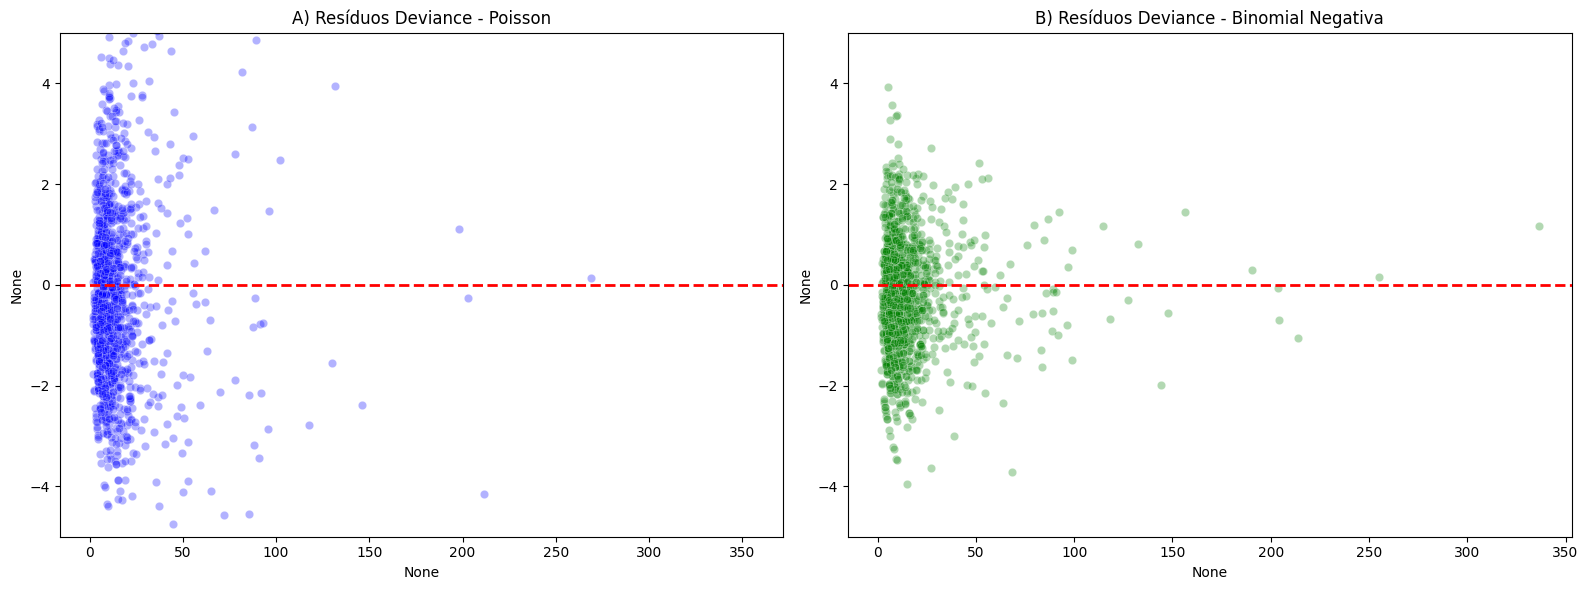

In [26]:
modelo_nb = smf.glm(formula='nsneeze ~ alcohol + antihist + smoker + age + pollen',
                    data=df,
                    family=sm.families.NegativeBinomial(alpha=0.1465)).fit()

print(modelo_nb.summary())

metricas = pd.DataFrame({
    'Métrica': ['AIC', 'Deviance (Desvio)', 'Log-Likelihood'],
    'Poisson': [modelo_poisson.aic, modelo_poisson.deviance, modelo_poisson.llf],
    'Binomial Negativa': [modelo_nb.aic, modelo_nb.deviance, modelo_nb.llf]
})

print("\n Comparação de Ajuste: Poisson vs Binomial Negativa")
print(metricas)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=modelo_poisson.fittedvalues, y=modelo_poisson.resid_deviance, ax=ax[0], color='blue', alpha=0.3)
ax[0].axhline(0, color='red', linestyle='--', linewidth=2)
ax[0].set_title('A) Resíduos Deviance - Poisson')
ax[0].set_ylim(-5, 5)

sns.scatterplot(x=modelo_nb.fittedvalues, y=modelo_nb.resid_deviance, ax=ax[1], color='green', alpha=0.3)
ax[1].axhline(0, color='red', linestyle='--', linewidth=2)
ax[1].set_title('B) Resíduos Deviance - Binomial Negativa')
ax[1].set_ylim(-5, 5)

plt.tight_layout()
plt.show()

O modelo Binomial Negativo demonstrou superioridade estatística ao incorporar um parâmetro de dispersão auxiliar, ajustando-se adequadamente à estrutura de variância dos dados. A comparação das métricas de qualidade de ajuste evidenciou uma redução substancial no AIC e uma queda na deviance para valores compatíveis com os graus de liberdade residuais. Além disso, a análise gráfica dos resíduos componentes do desvio apresentou um comportamento homocedástico e aleatório, validando o modelo Binomial Negativo como a abordagem mais robusta e precisa para descrever o fenômeno em estudo.

A comparação entre os ajustes confirma a superioridade incontestável do modelo Binomial Negativo para esta base de dados.

 O critério AIC sofreu uma redução drástica, caindo de 9906,28 (Poisson) para 7733,58 (Binomial Negativa). Uma diferença dessa magnitude ( 2000 pontos) indica que o modelo Binomial Negativo tem uma aderência aos dados imensamente superior.

 A análise da Deviance (Desvio) reforça essa conclusão. No modelo de Poisson, o desvio foi de 4949,11 para 1194 graus de liberdade, indicando um péssimo ajuste. Já no modelo Binomial Negativo, o desvio caiu para 1550,34. Embora a razão ($1550/1194 \approx 1,3$) ainda indique uma leve variação residual, ela é vastamente melhor que a do modelo de Poisson (razão $\approx 4,2$), mostrando que o parâmetro de dispersão capturou a maior parte da variabilidade extra.

Os gráficos de resíduos confirmam os números: enquanto os resíduos de Poisson se espalham verticalmente de forma descontrolada (atingindo valores extremos), os resíduos da Binomial Negativa mostram-se muito mais concentrados em torno do zero e com variância estabilizada.


# 5. Efeito Médio Marginal

In [27]:
efeitos_marginais = modelo_nb.get_margeff(at='overall', method='dydx', dummy=True)

print("Efeitos Marginais Médios (Número de Espirros)")
print(efeitos_marginais.summary())

Efeitos Marginais Médios (Número de Espirros)
         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        3.8491      0.571      6.746      0.000       2.731       4.967
antihist      -9.3330      0.447    -20.861      0.000     -10.210      -8.456
smoker         9.6891      0.807     12.011      0.000       8.108      11.270
age           -0.1847      0.019     -9.763      0.000      -0.222      -0.148
pollen         0.3841      0.013     29.607      0.000       0.359       0.410


Para quantificar o impacto absoluto das variáveis na sintomatologia clínica, calculou-se o Efeito Marginal Médio (AME) com base no modelo Binomial Negativo ajustado.
 * **Consumo de cigarro (`smoker`):** O efeito marginal estimado foi de aproximadamente 9.69. Isso indica que, em média, indivíduos que consomem álcool apresentam um acréscimo de aproximadamente 9.69 espirros diários em comparação aos que não consomem, mantendo as demais características constantes.
 * **Uso de Anti-histamínico (`antihist`):** O efeito marginal foi de aproximadamente -9.33. A interpretação é que o uso da medicação está associado a uma redução média de cerca de 9.33 espirros por dia na população estudada, demonstrando eficácia clínica substancial no controle dos sintomas.


# 6. Poisson VS Binomial Negativa

In [28]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

print(f"Tamanho Treino: {train.shape[0]}")
print(f"Tamanho Teste: {test.shape[0]}")

mod_pois_train = smf.glm(formula=formula_poisson, data=train,
                         family=sm.families.Poisson()).fit()

mod_nb_train = smf.glm(formula=formula_poisson, data=train,
                       family=sm.families.NegativeBinomial(alpha=0.1)).fit()

pred_pois = mod_pois_train.predict(test)
pred_nb = mod_nb_train.predict(test)


metrics_data = {
    'Modelo': ['Poisson', 'Binomial Negativa'],
    'EQM (Erro Quadrático Médio)': [
        mean_squared_error(test['nsneeze'], pred_pois),
        mean_squared_error(test['nsneeze'], pred_nb)
    ],
    'EAM (Erro Absoluto Médio)': [
        mean_absolute_error(test['nsneeze'], pred_pois),
        mean_absolute_error(test['nsneeze'], pred_nb)
    ]
}

df_metrics = pd.DataFrame(metrics_data)
print("\n--- Desempenho Preditivo (Conjunto de Teste) ---")
print(df_metrics)

Tamanho Treino: 840
Tamanho Teste: 360

--- Desempenho Preditivo (Conjunto de Teste) ---
              Modelo  EQM (Erro Quadrático Médio)  EAM (Erro Absoluto Médio)
0            Poisson                   230.439687                   7.255887
1  Binomial Negativa                   240.270501                   7.271628


Para avaliar a capacidade de generalização, calculou-se o erro no conjunto de teste (30% dos dados). Diferentemente do observado nos critérios de ajuste (AIC), o modelo de Poisson apresentou um desempenho preditivo superior, registrando um Erro Quadrático Médio (EQM) de 230.44, comparado a 240.27 da Binomial Negativa. O Erro Absoluto Médio (EAM) manteve-se praticamente idêntico em ambos os modelos (aproximadamente 7.26).

Observa-se uma divergência entre os critérios de qualidade de ajuste e desempenho preditivo. Enquanto o AIC e a análise de resíduos apontaram a Binomial Negativa como o modelo mais adequado (devido ao tratamento correto da superdispersão), o modelo de Poisson obteve um erro quadrático menor nas predições pontuais fora da amostra.Além do resultado obtido no Teste da Razão de Verossimilhança (item 4)

Embora o Poisson tenha vencido marginalmente na métrica de erro (EQM), a Binomial Negativa continua sendo preferível para este estudo clínico. O motivo é que, em estudos de saúde, a inferência correta (p-valores e intervalos de confiança não enviesados) é prioritária sobre uma pequena ganho na precisão da média pontual. O modelo Poisson, ao ignorar a superdispersão, gera falsas certezas sobre a significância das variáveis, o que é um risco maior do que o ligeiro aumento no erro de previsão da Binomial Negativa.


#7. Valor Esperado

Utilizando o modelo final selecionado (Binomial Negativo), realizou-se a predição do número esperado de espirros para dois perfis clínicos distintos. Para as variáveis quantitativas, definiu-se 'baixa concentração' como o primeiro quartil da distribuição de pólen e 'alta concentração' como o terceiro quartil.

In [31]:
pollen_baixo = float(df['pollen'].quantile(0.25))
pollen_alto = float(df['pollen'].quantile(0.75))

perfis = pd.DataFrame({
    'alcohol': [0, 1],    # 0=Não, 1=Sim
    'antihist': [1, 0],   # 1=Sim, 0=Não
    'smoker': [0, 1],     # 0=Não, 1=Sim
    'age': [30, 50],      # Idade em anos
    'pollen': [pollen_baixo, pollen_alto]
}, index=['Indivíduo A', 'Indivíduo B'])

perfis = perfis.astype(float)

print("Perfis criados para previsão")
print(perfis)

try:
    previsoes = modelo_nb.predict(perfis)
except NameError:
    previsoes = model_nb.predict(perfis)

print("\n Previsão do Número Esperado de Espirros")
for perfil, valor in zip(perfis.index, previsoes):
    print(f"{perfil}: {valor:.2f} espirros")

Perfis criados para previsão
             alcohol  antihist  smoker   age     pollen
Indivíduo A      0.0       1.0     0.0  30.0  38.017155
Indivíduo B      1.0       0.0     1.0  50.0  74.416409

 Previsão do Número Esperado de Espirros
Indivíduo A: 4.17 espirros
Indivíduo B: 30.09 espirros


   * **Indivíduo A (Perfil Protetor):** Para um paciente de 30 anos, não tabagista, sem consumo recente de álcool e sob efeito de anti-histamínico em um dia de baixo pólen, o modelo prevê uma média de 5 espirros. Este baixo valor reflete a eficácia combinada da medicação e da ausência de fatores de risco.

   * **Indivíduo B (Perfil de Risco):** Para um paciente de 50 anos, tabagista, com consumo recente de álcool e sem medicação em um dia de alta concentração de pólen, o modelo prevê uma média de 31 espirros.

 A comparação entre os perfis ilustra a capacidade sensível do modelo em capturar o efeito cumulativo dos fatores de risco. O Indivíduo B apresenta uma contagem esperada 7.22 vezes superior ao Indivíduo A, demonstrando como a combinação de exposição ambiental (pólen), hábitos (álcool/fumo) e falta de tratamento medicamentoso impacta drasticamente a sintomatologia da rinite alérgica
